# Veri Bilimi için İstatistik

## Temel İstatistik

### Örnek Teorisi

- Popülasyon içerisinden bu popülasyonu temsil ettiği düşünülen bir alt kümeye **örneklem** denir.
- Belirli kurallara göre seçilir ve yansız olması gerekir.
- Olasılıklı ve olasılıksız olarak iki türe ayrılır.
- **Örneklem dağılımı**, birden fazla seçilen örneklemin birbirlerine göre dağılımlarına denir.
- **Merkezi limit teoremi** büyük bir sayıda olan bağımsız ve aynı dağılım gösteren rassal değişkenlerin aritmetik ortalamasının, yaklaşık olarak normal dağılım göstereceğini ifade eden bir teoremdir.

Burada bir populasyondan örneklem seçme işlemini gerçekleştireceğiz. Bu işlemi numpy üzerinden yapacağız.<br>
Öncelikle random modulunun her seferinde aynı sayıları üretmesi için **seed** fonksiyonuna rastgele bir sayı veriyoruz. seed fonksiyonununa aynı sayı verildiğinde random fonksiyonundan her zaman aynı sayılar üretilecektir.<br>
Populasyon olarak 0 ile 80 yaşları arasında 10k kişiyi oluşturuyoruz. Bu populasyonun yaş ortalamasını örneklem üzerinden bulmaya çalışacağız.

In [12]:
import numpy as np
np.random.seed(0)
pop = np.random.randint(0,80,10000)
pop[:10]

array([44, 47, 64, 67, 67,  9, 21, 36, 70, 12])

Örneklem seçme işini yine numpy içerisindeki random modulu altındaki **choice** fonksiyonu ile gerçekleştireceğiz.

In [15]:
sample1 = np.random.choice(a=pop,size=100)
sample1[:10]

array([38, 12, 69, 55, 41, 14, 59, 65, 64, 66])

In [16]:
pop.mean()

39.3897

In [17]:
sample1.mean()

37.03

In [18]:
sample1.mean() / pop.mean()

0.9400934762133248

### Betimsel İstatistik

Betimsel istatistik aşağıdaki yöntemlerden oluşmaktadır;
* Merkezi Eğilim;
    * Ortalama
    * Medyan
    * Mod
    * Kartiller
* Dağılım;
    * Değişim Aralığı
    * Standart Sapma
    * Kovaryasyon
    * Korelasyon

**Kovaryans** iki değişkenin birlikte ne kadar değiştiklerinin ölçüsüdür. Kovaryans, iki rastgele değişkenin beraber değişimlerini inceleyen bir istatistiktir.

**Korelasyon**, iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkinin şiddetini ve yönünü ifade eden bir istatistiksel tekniktir.

In [19]:
!pip install researchpy

In [22]:
import seaborn as sns
df = sns.load_dataset("tips")

In [24]:
import researchpy as rp
rp.summary_cont(df.select_dtypes(["float64","int64"]))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [28]:
rp.summary_cat(df.select_dtypes(["category"]))

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


* Kovaryans

In [29]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


* Korelasyon

In [30]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


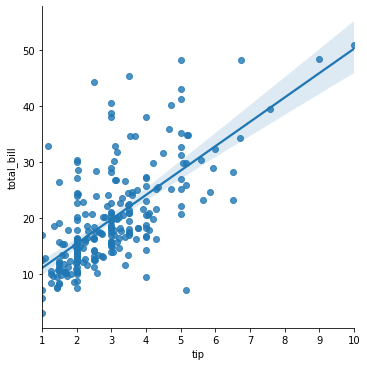

In [33]:
sns.lmplot(x="tip",y="total_bill",data=df);

### Güven Aralıkları

* Güven aralığı, istatistik biliminde bir anakütle parametresi için bir çeşit aralık kestirimi olup bir çıkarımsal istatistik çözüm aracıdır. Bir anakütle parametre değerinin tek bir sayı ile kestirimi yapılacağına, bu parametre değerini kapsayabilecek iki (alt ve üst sınır) sayıdan oluşan bir aralık bulunur. Böylece güven aralıkları bir kestirimin ne kadar güvenilir olduğunu gösterir.
* Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.
* Genelde 95% güven aralığı seçilmektedir.
* Hesaplanırken n(birim sayısı), ortalama ve standart sapma kullanılmaktadır.

* Problem : 
    * CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor.

* Detaylar:
    * Satıcı,alıcı ve bir ürün bulunmakta
    * Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor ve alıcılar birbirlerinin cevaplarından habersiz tutuluyor
    * Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

Fiyatları müşterilerden toplamış gibi varsayarak 5 ila 200 arasında 1000 gözlem oluşturuyoruz.

In [35]:
prices = np.random.randint(5,200,1000)

Bilimsel bir dayanağa göre fiyat belirlenmek sitenildiğinde en basit ve efektif yol ortalamayı almaktır. Fakat bu esneklik sağlamamaktadır.

In [36]:
prices.mean()

102.61

Burada esnekliği sağlayacak olan yöntem güven aralığıdır.<br>
**Güven aralığı hesaplamak için alttaki yolu izleriz.**

In [37]:
import statsmodels.stats.api as sms
sms.DescrStatsW(prices).tconfint_mean()

(99.14589303185839, 106.0741069681416)

Sonuç olarak 95% güven aralığıyla müşteriler 99 ila 106 lira arasında fiyat ödeyeceklerdir.
Kısacası 100 müşteriden 95inin ödeyeceği fiyat 99 ila 106 arasında olacaktır.